In [121]:
# mount google drive
from google.colab import drive
drive.mount("/content/gdrive")
file_path = '/content/gdrive/MyDrive/Sem-I/CMPE-255 Data Mining/Assignments4/Assignment4.1/cars.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Step 1: Data Loading**


We will load the data and inspect the first few rows to get a glimpse of the dataset.

In [122]:
import pandas as pd
pd.set_option('display.max_rows', None)

# Load the data
car_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
car_data.head()


,First Name,Last Name,Country,Car Brand,Car Model,Car Color,Year of Manufacture,Credit Card Type
0,Yetty,Arghent,Indonesia,Ford,Club Wagon,Teal,1993,mastercard
1,Crystal,Bosworth,China,Cadillac,Escalade ESV,Fuscia,2007,mastercard
2,Monro,Houdhury,Indonesia,Mazda,Miata MX-5,Orange,2009,maestro
3,Bowie,Clair,China,Audi,A4,Orange,2005,instapayment
4,Myrvyn,McAllister,Czech Republic,Nissan,Maxima,Pink,1994,maestro


**Step 2: Data Cleaning**

Let's start this step by:

1. Checking the shape of the dataset to determine the number of rows and columns.
2. Identifying the data types of each column.
3. Checking for missing values in the dataset.

In [123]:
# Check the shape of the dataset
data_shape = car_data.shape

# Check data types of each column
data_types = car_data.dtypes

# Check for missing values in the dataset
missing_values = car_data.isnull().sum()

data_shape, data_types, missing_values

((30000, 8),
 First Name             object
 Last Name              object
 Country                object
 Car Brand              object
 Car Model              object
 Car Color              object
 Year of Manufacture     int64
 Credit Card Type       object
 dtype: object,
 First Name             0
 Last Name              0
 Country                0
 Car Brand              0
 Car Model              0
 Car Color              0
 Year of Manufacture    0
 Credit Card Type       0
 dtype: int64)

Step 2.1: Checking for Duplicates

In [124]:
# Check for duplicate rows
duplicate_rows = car_data.duplicated().sum()

# If there are duplicates, drop them
if duplicate_rows > 0:
    car_data.drop_duplicates(inplace=True)

duplicate_rows

0

Step 2.2: Inspecting Potential Outliers

0        1993
1        2007
2        2009
3        2005
4        1994
5        2006
6        2004
7        2007
8        1996
9        1994
10       1996
11       1994
12       2000
13       2008
14       1999
15       2012
16       2007
17       2010
18       1998
19       1996
20       1996
21       1998
22       2010
23       2009
24       2009
25       2012
26       1993
27       1987
28       2009
29       1992
30       2001
31       1993
32       1995
33       1997
34       2006
35       1994
36       2002
37       2006
38       2012
39       1997
40       1993
41       2010
42       1996
43       2011
44       2008
45       2004
46       2011
47       1999
48       1999
49       2012
50       2006
51       1987
52       2002
53       2003
54       2000
55       1994
56       1993
57       1998
58       2003
59       2005
60       2012
61       2010
62       2001
63       2001
64       2007
65       2003
66       2012
67       2004
68       1999
69       1995
70       1999
71    

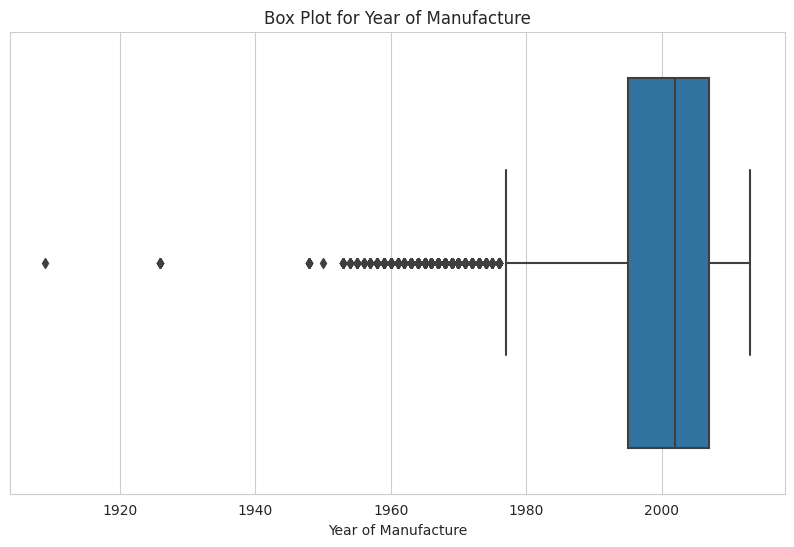

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Plotting a box plot for "Year of Manufacture"
plt.figure(figsize=(10, 6))
x=car_data["Year of Manufacture"]
print(x)
sns.boxplot(x=car_data["Year of Manufacture"])
plt.title("Box Plot for Year of Manufacture")
plt.show()


**Step 3: Data Profiling**

Data profiling involves understanding the summary statistics and distributions of the dataset. We'll focus on:

Summary statistics for the numeric column: "Year of Manufacture".
Frequency distribution for categorical columns: "Country", "Car Brand", "Car Color", and "Credit Card Type".

**Step 3: Visualization for "Country" column**


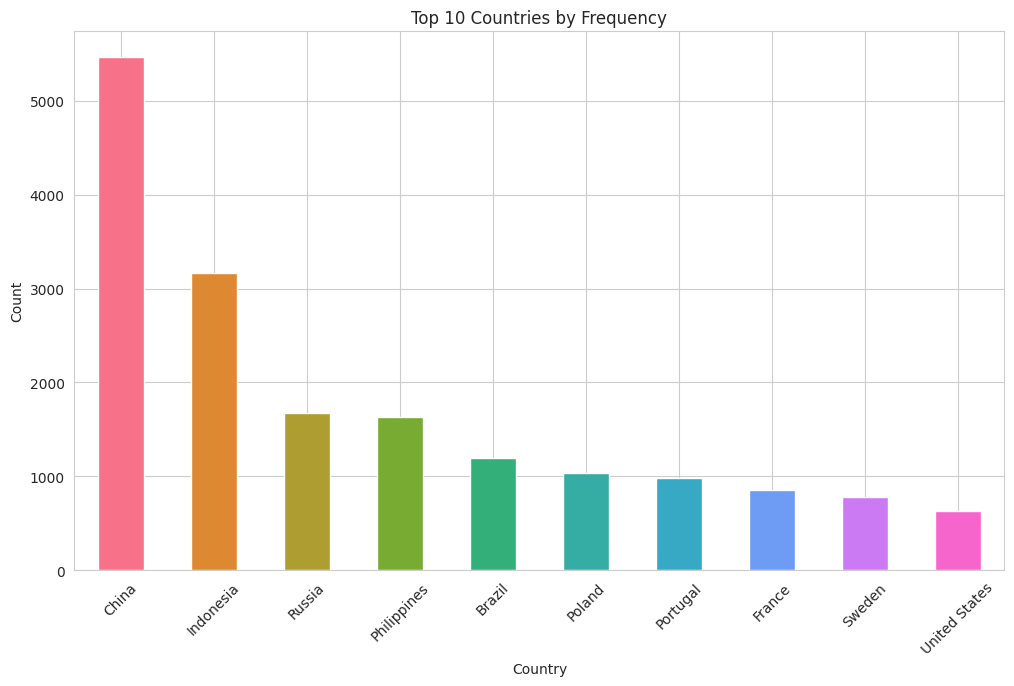

In [126]:
# Get the top 10 countries by frequency
top_countries = car_data["Country"].value_counts().head(10)

# Plotting the bar plot for top 10 countries
plt.figure(figsize=(12, 7))
top_countries.plot(kind='bar', color=sns.color_palette("husl", 10))
plt.title("Top 10 Countries by Frequency")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Visualization for "Car Brand" column**

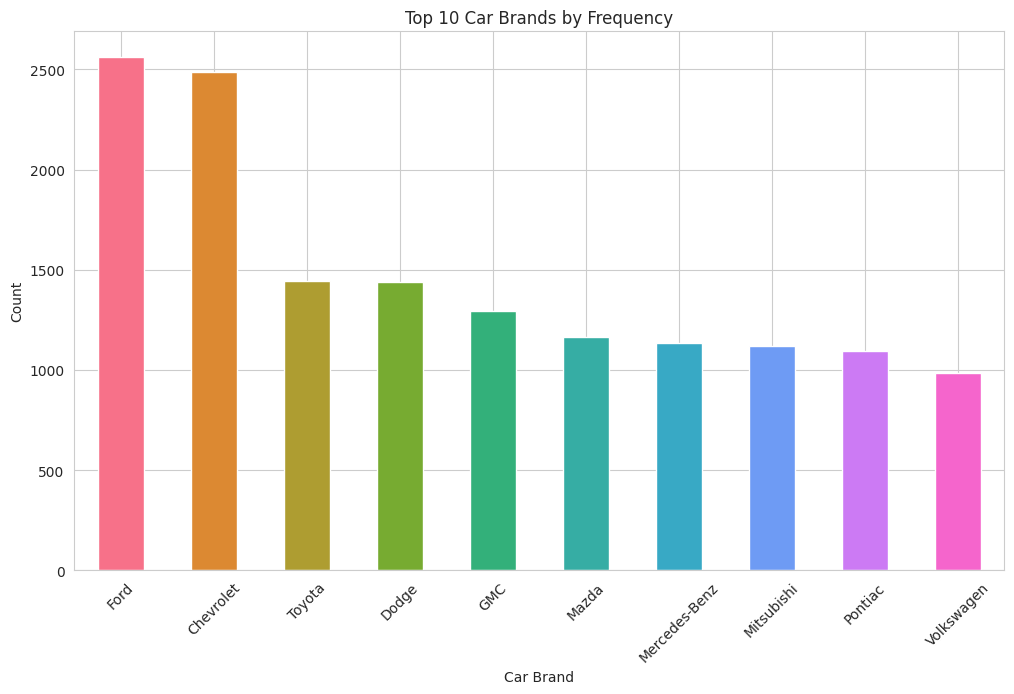

In [127]:
# Get the top 10 car brands by frequency
top_brands = car_data["Car Brand"].value_counts().head(10)

# Plotting the bar plot for top 10 car brands
plt.figure(figsize=(12, 7))
top_brands.plot(kind='bar', color=sns.color_palette("husl", 10))
plt.title("Top 10 Car Brands by Frequency")
plt.xlabel("Car Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


**Visualization for "Car Color" column**

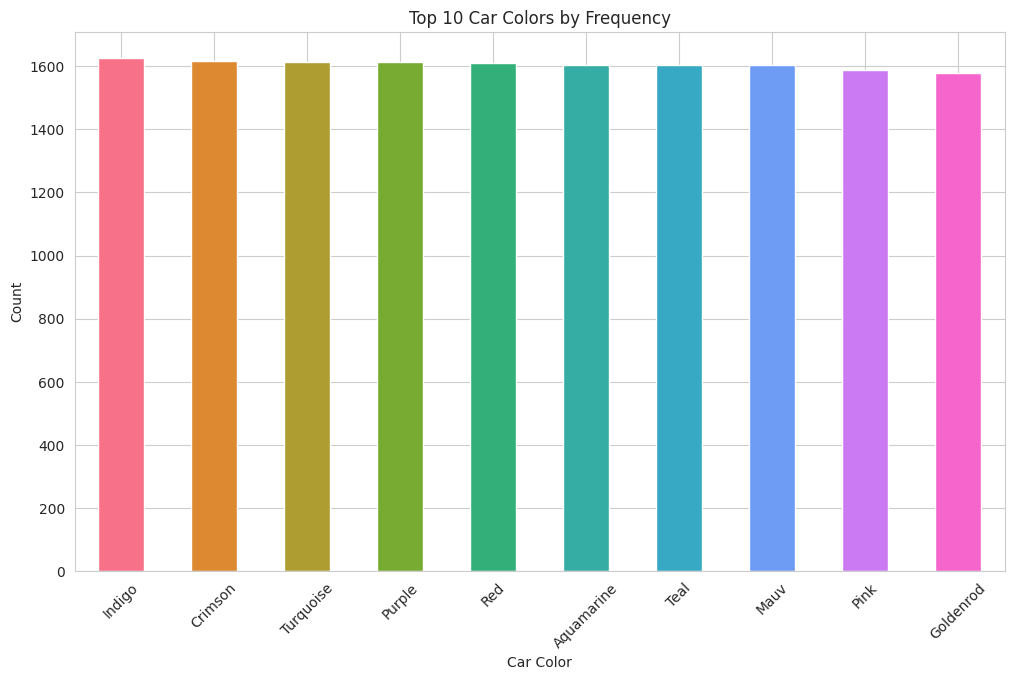

In [128]:
# Get the top 10 car colors by frequency
top_colors = car_data["Car Color"].value_counts().head(10)

# Plotting the bar plot for top 10 car colors
plt.figure(figsize=(12, 7))
top_colors.plot(kind='bar', color=sns.color_palette("husl", 10))
plt.title("Top 10 Car Colors by Frequency")
plt.xlabel("Car Color")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


**Visualization for "Credit Card Type" column**

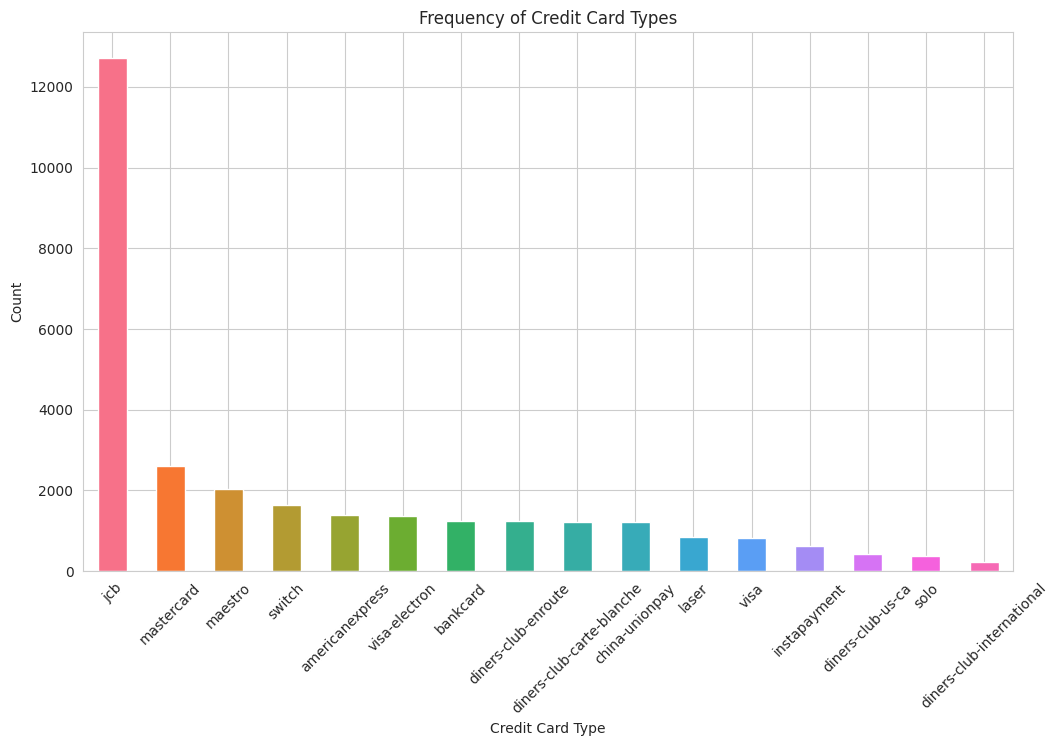

In [129]:
# Get the top credit card types by frequency
top_card_types = car_data["Credit Card Type"].value_counts()

# Plotting the bar plot for credit card types
plt.figure(figsize=(12, 7))
top_card_types.plot(kind='bar', color=sns.color_palette("husl", len(top_card_types)))
plt.title("Frequency of Credit Card Types")
plt.xlabel("Credit Card Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


**Step 4: General Data Visualization Exploration**

**4.1 Yearly Distribution**


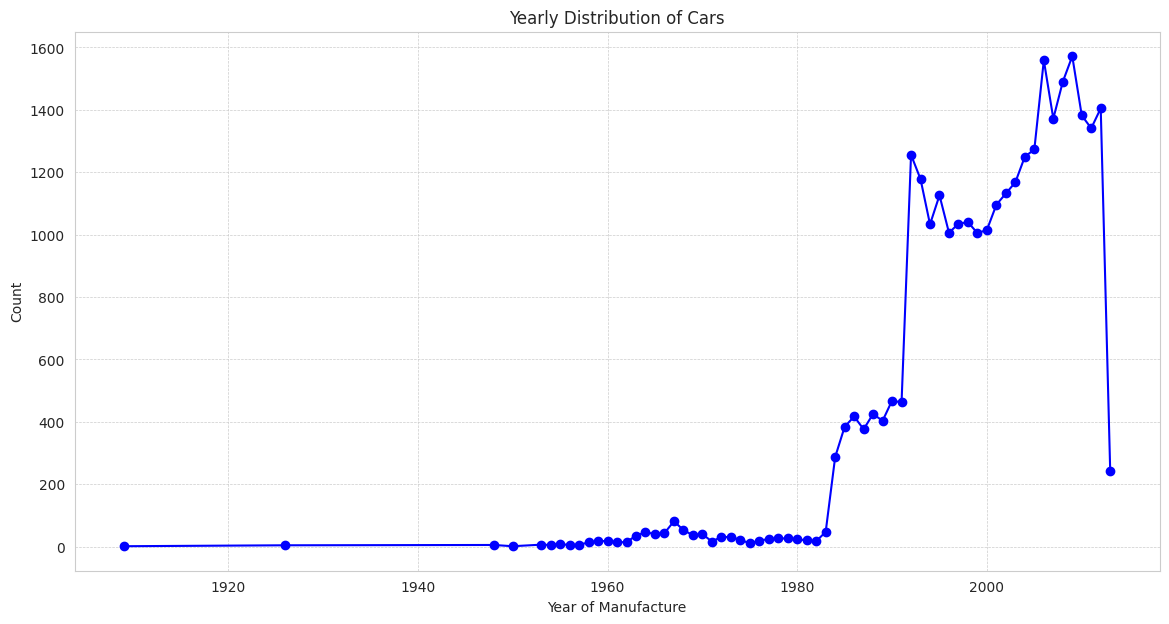

In [130]:
# Yearly distribution of cars
yearly_distribution = car_data["Year of Manufacture"].value_counts().sort_index()

# Plotting the yearly distribution
plt.figure(figsize=(14, 7))
yearly_distribution.plot(kind='line', marker='o', linestyle='-', color='blue')
plt.title("Yearly Distribution of Cars")
plt.xlabel("Year of Manufacture")
plt.ylabel("Count")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


**4.2 Country vs. Car Brand**


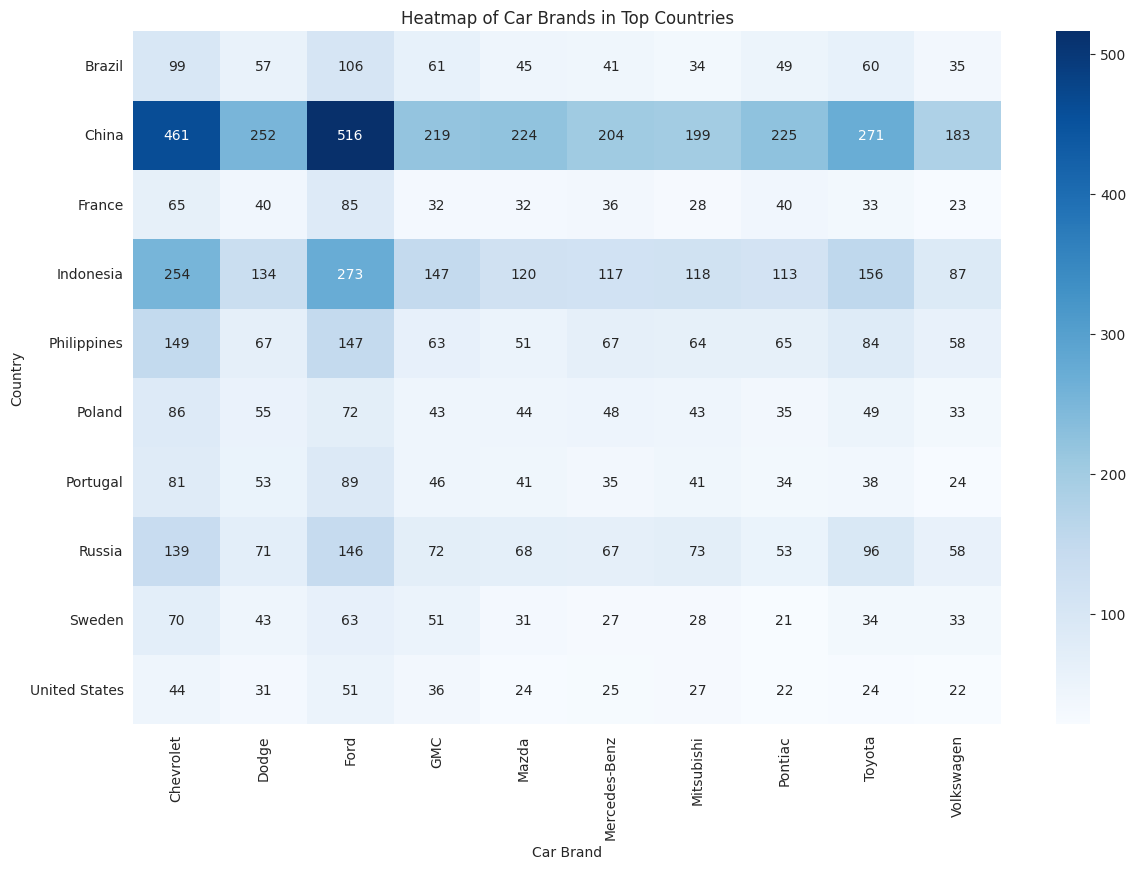

In [131]:
# Creating a pivot table for top countries and car brands
top_countries_list = car_data["Country"].value_counts().head(10).index.tolist()
top_brands_list = car_data["Car Brand"].value_counts().head(10).index.tolist()

country_brand_pivot = car_data[car_data["Country"].isin(top_countries_list) &
                               car_data["Car Brand"].isin(top_brands_list)]
pivot_table = country_brand_pivot.groupby(["Country", "Car Brand"]).size().unstack().fillna(0)

# Plotting the heatmap
plt.figure(figsize=(14, 9))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="Blues")
plt.title("Heatmap of Car Brands in Top Countries")
plt.ylabel("Country")
plt.xlabel("Car Brand")
plt.show()


**4.3 Car Color vs. Car Brand**


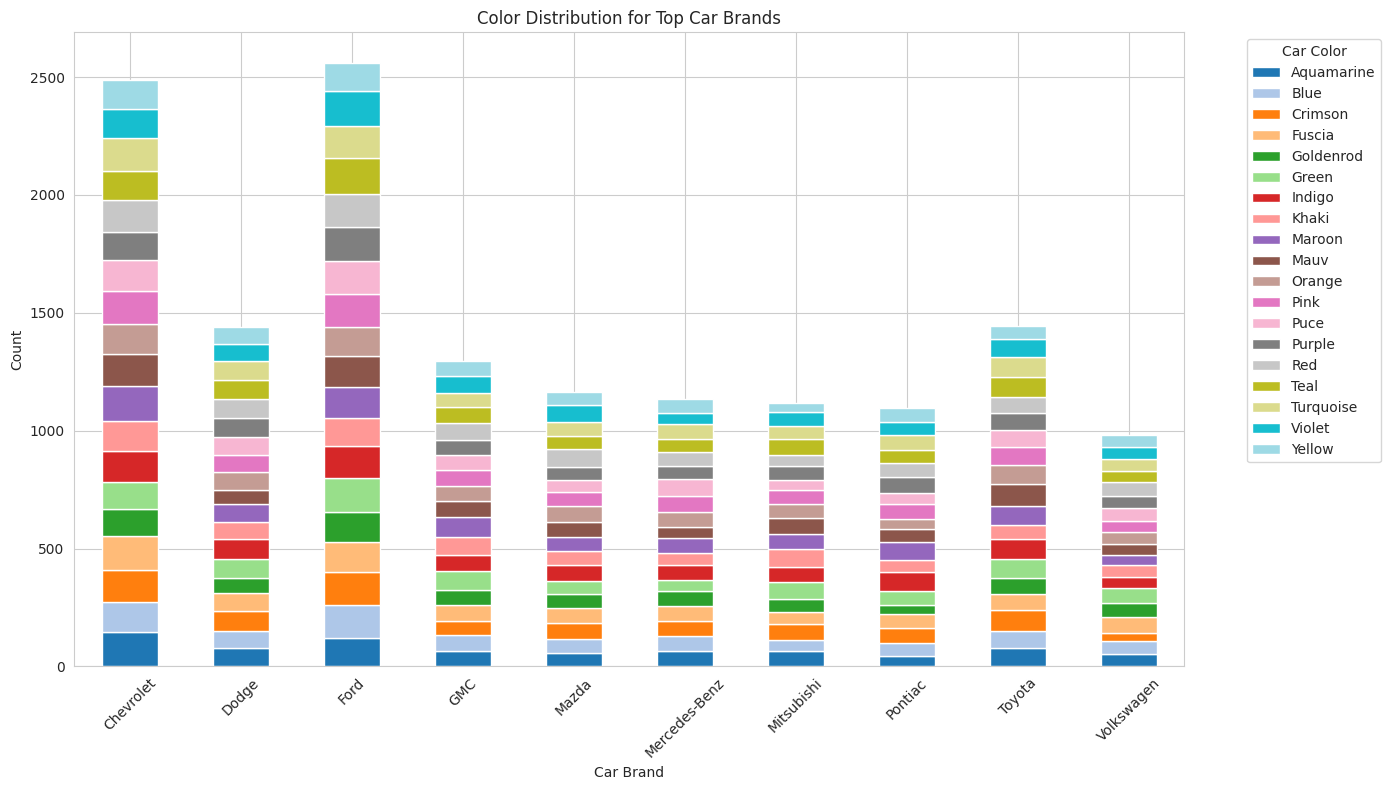

In [132]:
# Creating a pivot table for top car brands and their colors
brand_color_pivot = car_data[car_data["Car Brand"].isin(top_brands_list)]
pivot_table_colors = brand_color_pivot.groupby(["Car Brand", "Car Color"]).size().unstack().fillna(0)

# Plotting the stacked bar chart
pivot_table_colors.plot(kind='bar', stacked=True, figsize=(14, 8), colormap="tab20")
plt.title("Color Distribution for Top Car Brands")
plt.ylabel("Count")
plt.xlabel("Car Brand")
plt.xticks(rotation=45)
plt.legend(title="Car Color", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**4.4 Year of Manufacture vs. Car Brand**

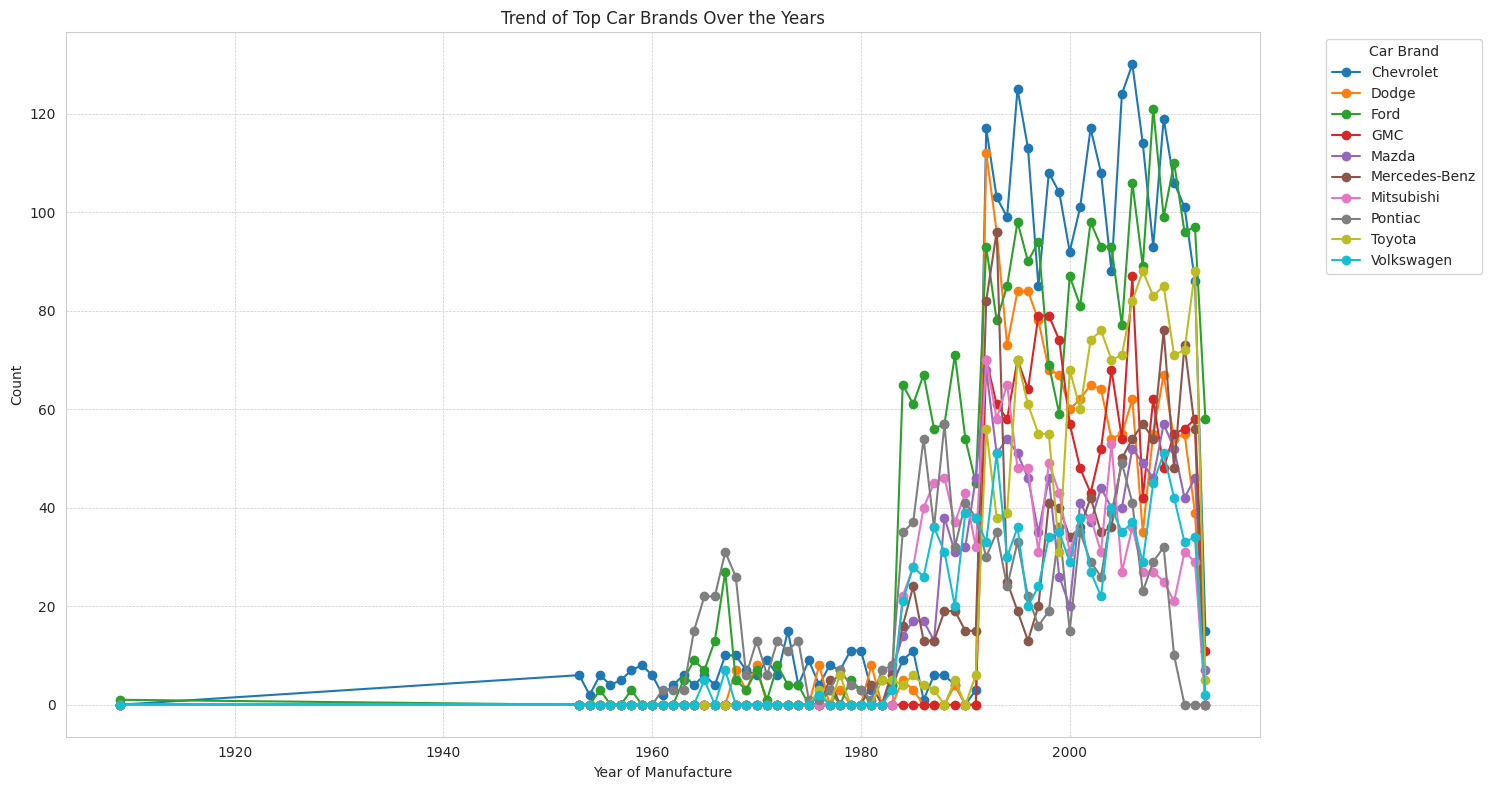

In [133]:
# Creating a pivot table for top car brands over the years
year_brand_pivot = car_data[car_data["Car Brand"].isin(top_brands_list)]
pivot_table_years = year_brand_pivot.groupby(["Year of Manufacture", "Car Brand"]).size().unstack().fillna(0)

# Plotting the line chart for top car brands over the years
pivot_table_years.plot(figsize=(15, 8), marker='o', linestyle='-')
plt.title("Trend of Top Car Brands Over the Years")
plt.ylabel("Count")
plt.xlabel("Year of Manufacture")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(title="Car Brand", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [134]:
!pip install IPython


In [135]:
# Get the top 10 car colors by frequency
year_of_manufacture = car_data["Year of Manufacture"].value_counts().sort_index()

In [136]:
%%html
<script src="https://d3js.org/d3.v7.min.js"></script>
<div id="d3-container"></div>
<script>

        var yearlyData = [
            { "year": 1990, "count": 50 },
            { "year": 1991, "count": 60 }
        ];

        // Set up SVG dimensions
        var margin = { top: 20, right: 20, bottom: 30, left: 50 },
            width = 960 - margin.left - margin.right,
            height = 500 - margin.top - margin.bottom;

        // Set up scales
        var x = d3.scaleLinear().range([0, width]);
        var y = d3.scaleLinear().range([height, 0]);

        // Define the line
        var valueline = d3.line()
            .x(function (d) { return x(d.year); })
            .y(function (d) { return y(d.count); });

        // Append SVG to the body
        var svg = d3.select("body")
            .append("svg")
            .attr("width", width + margin.left + margin.right)
            .attr("height", height + margin.top + margin.bottom)
            .append("g")
            .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

        // Scale the range of the data
        x.domain(d3.extent(yearlyData, function (d) { return d.year; }));
        y.domain([0, d3.max(yearlyData, function (d) { return d.count; })]);

        // Add the valueline path
        svg.append("path")
            .data([yearlyData])
            .attr("class", "line")
            .attr("d", valueline);

        // Add the X Axis
        svg.append("g")
            .attr("transform", "translate(0," + height + ")")
            .call(d3.axisBottom(x));

        // Add the Y Axis
        svg.append("g")
            .call(d3.axisLeft(y));
</script>


In [137]:
%%html
<script src="https://d3js.org/d3.v7.min.js"></script>
<div id="d3-container"></div>
<script>
var stackedData = [
            { "brand": "Ford", "Pink": 40, "Blue": 30, "Red": 20, "Green": 10 },
            { "brand": "Chevrolet", "Pink": 20, "Blue": 25, "Red": 30, "Green": 25 }
        ];

        // Set up SVG dimensions
        var margin = { top: 50, right: 10, bottom: 100, left: 50 },
            width = 600 - margin.left - margin.right,
            height = 400 - margin.top - margin.bottom;

        // Create SVG element
        var svg = d3.select("body").append("svg")
            .attr("width", width + margin.left + margin.right)
            .attr("height", height + margin.top + margin.bottom)
            .append("g")
            .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

        // Set up scales
        var x = d3.scaleBand().range([0, width]).domain(stackedData.map(function (d) { return d.brand; }));
        var y = d3.scaleLinear().range([height, 0]);
        var z = d3.scaleOrdinal(d3.schemeCategory10).domain(["Pink", "Blue", "Red", "Green"]);

        // Stack the data
        var stack = d3.stack().keys(["Pink", "Blue", "Red", "Green"]);
        var stackedSeries = stack(stackedData);

        // Adjust Y scale domain based on stacked data
        y.domain([0, d3.max(stackedSeries, series => d3.max(series, d => d[1]))]);

        // Draw the stacked bars
        svg.selectAll(".brand")
            .data(stackedSeries)
            .enter().append("g")
            .attr("fill", d => z(d.key))
            .selectAll("rect")
            .data(d => d)
            .enter().append("rect")
            .attr("x", d => x(d.data.brand))
            .attr("y", d => y(d[1]))
            .attr("height", d => y(d[0]) - y(d[1]))
            .attr("width", x.bandwidth());

        // Add X axis
        svg.append("g")
            .attr("transform", "translate(0," + height + ")")
            .call(d3.axisBottom(x))
            .selectAll("text")
            .attr("transform", "rotate(-45)")
            .style("text-anchor", "end");

        // Add Y axis
        svg.append("g")
            .call(d3.axisLeft(y));
</script>

In [138]:
%%html
<script src="https://d3js.org/d3.v7.min.js"></script>
<div id="d3-container"></div>
<script>
var lineData = [
            { "year": 1990, "Ford": 50, "Chevrolet": 40 },
            { "year": 1991, "Ford": 55, "Chevrolet": 42 },
            // ... add other data points
        ];

        // Set up SVG dimensions
        var margin = { top: 20, right: 20, bottom: 30, left: 50 },
            width = 960 - margin.left - margin.right,
            height = 500 - margin.top - margin.bottom;

        // Set up scales
        var x = d3.scaleLinear().range([0, width]);
        var y = d3.scaleLinear().range([height, 0]);
        var z = d3.scaleOrdinal(d3.schemeCategory10);

        // Define the line
        var line = d3.line()
            .x(function (d) { return x(d.year); });

        // Append SVG to the body
        var svg = d3.select("body")
            .append("svg")
            .attr("width", width + margin.left + margin.right)
            .attr("height", height + margin.top + margin.bottom)
            .append("g")
            .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

        // Scale the range of the data
        x.domain(d3.extent(lineData, function (d) { return d.year; }));
        y.domain([0, d3.max(lineData, function (d) {
            return Math.max(d["Ford"], d["Chevrolet"]);  // extend for other brands
        })]);

        z.domain(["Ford", "Chevrolet"]);  // extend for other brands

        // Create a line for each brand
        ["Ford", "Chevrolet"].forEach(function (brand) {  // extend for other brands
            line.y(function (d) { return y(d[brand]); });
            svg.append("path")
                .data([lineData])
                .attr("class", "line")
                .style("stroke", z(brand))
                .attr("d", line);
        });

        // Add the X Axis
        svg.append("g")
            .attr("transform", "translate(0," + height + ")")
            .call(d3.axisBottom(x));

        // Add the Y Axis
        svg.append("g")
            .call(d3.axisLeft(y));
  </script>